<a href="https://colab.research.google.com/github/JJANGJJANGMEE/colab/blob/master/JJM_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirts', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

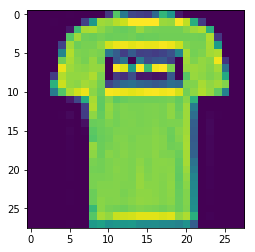

In [11]:
plt.imshow(train_images[1])

In [12]:
plt.colorbar()

RuntimeError: ignored

<Figure size 432x288 with 0 Axes>

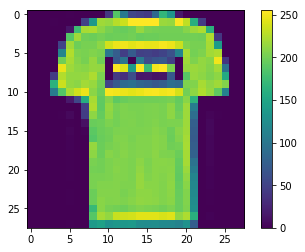

In [15]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

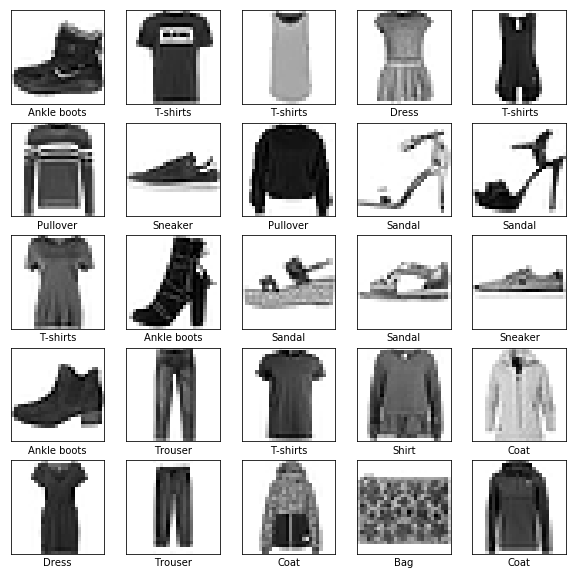

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

W0814 12:11:48.247846 139980219983744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4965 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3782 - acc: 0.8623
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3367 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3121 - acc: 0.8832
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2952 - acc: 0.8905


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3571 - acc: 0.8689
테스트 정확도: 0.8689


In [0]:
predictions = model.predict(test_images)

In [28]:
predictions[0]

array([1.4259163e-04, 8.9326527e-08, 4.4107137e-06, 3.6714045e-08,
       2.2892205e-05, 4.5983974e-02, 3.9036513e-05, 5.1198296e-02,
       1.0435470e-04, 9.0250432e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [31]:
class_names[np.argmax(predictions[0])]

'Ankle boots'

In [32]:
test_labels[0]

9

In [33]:
predictions[5]

array([1.0200792e-03, 9.9894065e-01, 9.0533723e-07, 1.9625691e-05,
       2.1404403e-06, 2.2786018e-10, 1.6558641e-05, 1.1307970e-13,
       1.8125636e-08, 7.0854837e-12], dtype=float32)

In [34]:
np.argmax(predictions[5])

1

In [35]:
class_names[np.argmax(predictions[5])]

'Trouser'

In [38]:
test_labels[5]

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color = color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
    
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

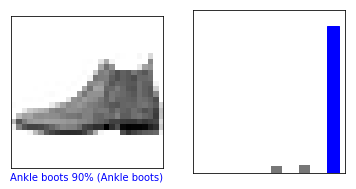

In [46]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

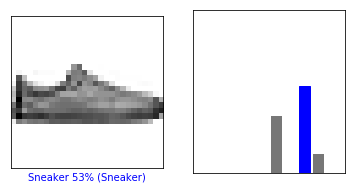

In [47]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

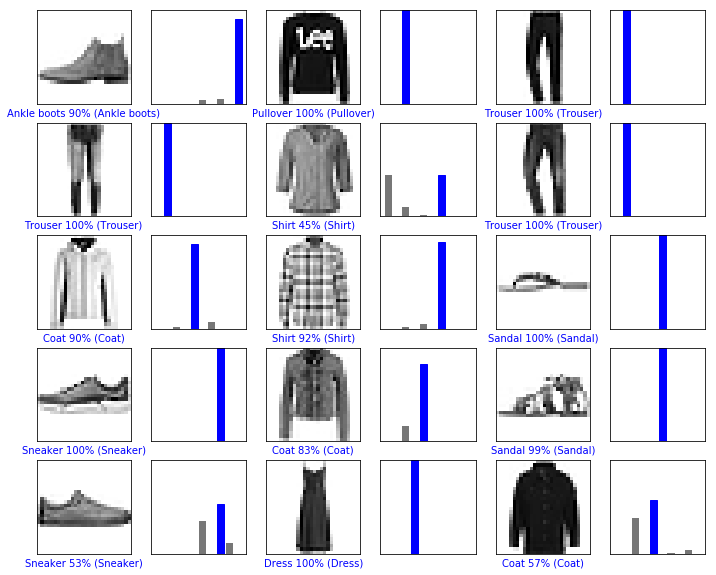

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [49]:
img = test_images[0]
print(img.shape)

(28, 28)


In [0]:
img = (np.expand_dims(img, 0))

In [51]:
print(img.shape)

(1, 28, 28)


In [52]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.4259190e-04 8.9326363e-08 4.4107137e-06 3.6713903e-08 2.2892140e-05
  4.5983963e-02 3.9036513e-05 5.1198244e-02 1.0435470e-04 9.0250432e-01]]


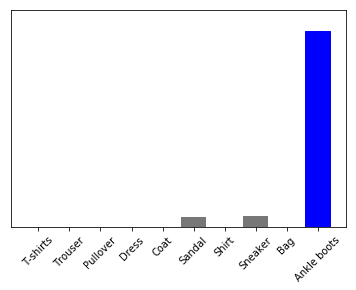

In [53]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [54]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


In [61]:
# 내 구글드라이브 'colab'에 파일 업로드하는 코드
# https://yamalab.tistory.com/80
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
# 특정 폴더 안으로 파일 삽입
uploaded = drive.CreateFile({'title': 'Sample upload.txt', "parents": [{"kind": "drive#fileLink","id": '1OG5irP0afwk6Q_saSKJjhCwgGHQAYNMU'}]})

uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

W0814 13:26:39.434143 139980219983744 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

Uploaded file with ID 1u8QTPD7_24UqLsN6So7cjM6tH8013Exn
Downloaded content "Sample upload file content"
